In [1]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #K Neighbors Classifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load breast cancer data

BreastData = load_breast_cancer()

#X Data
X = BreastData.data
print('X Data is \n' , X[:10])
print('X shape is ' , X.shape)
print('X Features are \n' , BreastData.feature_names)

#y Data
y = BreastData.target
print('y Data is \n' , y[:10])
print('y shape is ' , y.shape)
print('y Columns are \n' , BreastData.target_names)

X Data is 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.8

In [3]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (381, 30)
X_test shape is  (188, 30)
y_train shape is  (381,)
y_test shape is  (188,)


In [4]:
#Applying KNeighborsClassifier Model 
#splitting data into classes

'''
#sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform’, algorithm=’auto’, leaf_size=30,
#                                       p=2, metric='minkowski’, metric_params=None,n_jobs=None)
'''

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.9343832020997376
KNNClassifierModel Test Score is :  0.9468085106382979


In [5]:
#Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
print('Predicted Value for KNNClassifierModel is : \n' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : \n' , y_pred_prob[:10])

#calculating actual data
print('Actual value are :\n',y_test[:10])

Predicted Value for KNNClassifierModel is : 
 [0 0 1 0 1 1 1 0 0 1]
Prediction Probabilities Value for KNNClassifierModel is : 
 [[0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.  1. ]
 [0.8 0.2]
 [1.  0. ]
 [0.  1. ]]
Actual value are :
 [0 0 1 0 1 1 1 1 0 1]


Confusion Matrix is : 
 [[ 65   3]
 [  7 113]]


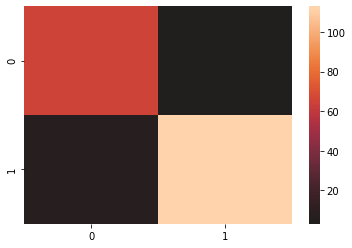

In [6]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()